# Importing Libraries

In [12]:
import pandas as pd
import numpy as np
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


# Data Preprocessing and Feature Extraction

In [3]:
#data prep
products = pd.read_csv('/content/drive/MyDrive/medical-drug-review/datasets/webmd.csv')
print(products.columns)

<ipython-input-3-99643a6c6b22>:2: DtypeWarning: Columns (0,1,2,3,7,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  products = pd.read_csv('/content/drive/MyDrive/medical-drug-review/datasets/webmd.csv')


Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')


In [4]:
drugIds=np.unique(products['DrugId'])
print(drugIds[0:10])

[  9800.  12112.  75352.  93965. 144731. 146724. 149297. 154120. 163180.
 163405.]


In [5]:
relevant_cols=['Reviews','Satisfaction','DrugId']
products = products.loc[:, relevant_cols]

products.dropna(subset=['Reviews','Satisfaction','DrugId'], inplace=True)
products.reset_index(drop=True, inplace=True)

products.head()

,Reviews,Satisfaction,DrugId
0,I'm a retired physician and of all the meds I ...,5.0,146724.0
1,cleared me right up even with my throat hurtin...,5.0,146724.0
2,why did my PTINR go from a normal of 2.5 to ov...,3.0,144731.0
3,FALLING AND DON'T REALISE IT,1.0,144731.0
4,My grandfather was prescribed this medication ...,1.0,144731.0


In [6]:
print(products['Reviews'][70])

This medication changed my life, I have always had heavy periods because of my thyroid condition but it was not just heavy bleeding but extreme Pain now the pain is manageable and even though it is now a longer period it is so much easier to handle Lysteda changed my life 


In [6]:
def remove_punctuation(text):
    try: # python 2.x
        text = text.translate(None, string.punctuation)
    except: # python 3.x
        translator = text.maketrans('', '', string.punctuation)
        text = text.translate(translator)
    return text

products['Reviews'] = products['Reviews'].apply(remove_punctuation)
print(products['Reviews'])

0      Im a retired physician and of all the meds I h...
1      cleared me right up even with my throat hurtin...
2      why did my PTINR go from a normal of 25 to ove...
3                            FALLING AND DONT REALISE IT
4      My grandfather was prescribed this medication ...
                             ...                        
308                          pinched nerve in lower back
309    I had a friend who was diagnosed with Fibromya...
310    I had mild visual hallucinations after a week ...
311    had reaction spent week in hospital in semi co...
312                                                     
Name: Reviews, Length: 313, dtype: object


In [7]:
stop_words_list = open("/content/drive/MyDrive/medical-drug-review/datasets/stopwords.txt","r")
stop_words_list = stop_words_list.readlines()
stop_words=[]
for word in stop_words_list:
    stop_words.append(word.split('\n')[0])
print(stop_words)

['x', 'y', 'your', 'yours', 'yourself', 'yourselves', 'you', 'yond', 'yonder', 'yon', 'ye', 'yet', 'z', 'zillion', 'j', 'u', 'umpteen', 'usually', 'us', 'username', 'uponed', 'upons', 'uponing', 'upon', 'ups', 'upping', 'upped', 'up', 'unto', 'until', 'unless', 'unlike', 'unliker', 'unlikest', 'under', 'underneath', 'use', 'used', 'usedest', 'r', 'rath', 'rather', 'rathest', 'rathe', 're', 'relate', 'related', 'relatively', 'regarding', 'really', 'res', 'respecting', 'respectively', 'q', 'quite', 'que', 'qua', 'n', 'neither', 'neaths', 'neath', 'nethe', 'nethermost', 'necessary', 'necessariest', 'necessarier', 'never', 'nevertheless', 'nigh', 'nighest', 'nigher', 'nine', 'noone', 'nobody', 'nobodies', 'nowhere', 'nowheres', 'no', 'noes', 'nor', 'nos', 'no-one', 'none', 'not', 'notwithstanding', 'nothings', 'nothing', 'nathless', 'natheless', 't', 'ten', 'tills', 'till', 'tilled', 'tilling', 'to', 'towards', 'toward', 'towardest', 'towarder', 'together', 'too', 'thy', 'thyself', 'thus',

In [8]:
feature_encoding='tfidf_word_count_' # tfidf_word_count_ or word_count_
balance_labels=False # True or False
analyzer='word'       # ‘word’, ‘char’, ‘char_wb’
ngram_range=(1, 1)    # unigram - (1,1), unigram & bigram - (1,2), bigram - (2,2)
stop_words='english' # stop_words or 'english'

In [10]:
# Word Importance: Frequency counts


#analyzer='word'       # ‘word’, ‘char’, ‘char_wb’
#ngram_range=(2, 2)    # unigram - (1,1), unigram & bigram - (1,2), bigram - (2,2)
#stop_words=stop_words # stop_words or 'english'

'''
count_vect = CountVectorizer(analyzer=analyzer, ngram_range=ngram_range, stop_words=stop_words)
X_train_counts = count_vect.fit_transform(products['Reviews'])

wc_feature_names = np.array(count_vect.get_feature_names_out())
print('wc_feature_names: {}'.format(wc_feature_names))

word_count_df = pd.DataFrame(X_train_counts.toarray())
word_count_df = word_count_df.add_prefix('word_count_')

products = pd.concat([products, word_count_df], axis=1)
print(products.head())
'''

"\ncount_vect = CountVectorizer(analyzer=analyzer, ngram_range=ngram_range, stop_words=stop_words)\nX_train_counts = count_vect.fit_transform(products['Reviews'])\n\nwc_feature_names = np.array(count_vect.get_feature_names_out())\nprint('wc_feature_names: {}'.format(wc_feature_names))\n\nword_count_df = pd.DataFrame(X_train_counts.toarray())\nword_count_df = word_count_df.add_prefix('word_count_')\n\nproducts = pd.concat([products, word_count_df], axis=1)\nprint(products.head())\n"

In [9]:



tfidf_transformer = TfidfTransformer()
count_vect = CountVectorizer(analyzer=analyzer, ngram_range=ngram_range, stop_words=stop_words)

X_train_counts = count_vect.fit_transform(products['Reviews'])
wc_feature_names = np.array(count_vect.get_feature_names_out())
print('wc_feature_names: {}'.format(wc_feature_names))

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
word_count_df = pd.DataFrame(X_train_tfidf.toarray())
word_count_df = word_count_df.add_prefix('tf_idf_word_count_')
products = pd.concat([products, word_count_df], axis=1)
print(products.head())

wc_feature_names: ['10' '100' '1000' ... 'zinc' 'zingers' 'zombie']
                                             Reviews  Satisfaction    DrugId  \
0  Im a retired physician and of all the meds I h...           5.0  146724.0   
1  cleared me right up even with my throat hurtin...           5.0  146724.0   
2  why did my PTINR go from a normal of 25 to ove...           3.0  144731.0   
3                        FALLING AND DONT REALISE IT           1.0  144731.0   
4  My grandfather was prescribed this medication ...           1.0  144731.0   

   tf_idf_word_count_0  tf_idf_word_count_1  tf_idf_word_count_2  \
0                  0.0             0.000000                  0.0   
1                  0.0             0.000000                  0.0   
2                  0.0             0.483076                  0.0   
3                  0.0             0.000000                  0.0   
4                  0.0             0.000000                  0.0   

   tf_idf_word_count_3  tf_idf_word_count_

In [13]:


#analyzer='word'       # ‘word’, ‘char’, ‘char_wb’
#ngram_range=(2, 2)    # unigram - (1,1), unigram & bigram - (1,2), bigram - (2,2)
#stop_words=stop_words # stop_words or 'english'
tfidf = TfidfVectorizer(analyzer=analyzer, ngram_range=ngram_range, stop_words=stop_words)

X_train_tfidf = tfidf.fit_transform(products['Reviews'])
tfidf_df = pd.DataFrame(X_train_tfidf.toarray())
tfidf_df = word_count_df.add_prefix('tfidf_word_count_')
tfidf_feature_names = np.array(tfidf.get_feature_names_out())
print('tfidf_feature_names: {}'.format(tfidf_feature_names))

products = pd.concat([products, tfidf_df], axis=1)
print(products.head())

tfidf_feature_names: ['10' '100' '1000' ... 'zinc' 'zingers' 'zombie']
                                             Reviews  Satisfaction    DrugId  \
0  Im a retired physician and of all the meds I h...           5.0  146724.0   
1  cleared me right up even with my throat hurtin...           5.0  146724.0   
2  why did my PTINR go from a normal of 25 to ove...           3.0  144731.0   
3                        FALLING AND DONT REALISE IT           1.0  144731.0   
4  My grandfather was prescribed this medication ...           1.0  144731.0   

   tf_idf_word_count_0  tf_idf_word_count_1  tf_idf_word_count_2  \
0                  0.0             0.000000                  0.0   
1                  0.0             0.000000                  0.0   
2                  0.0             0.483076                  0.0   
3                  0.0             0.000000                  0.0   
4                  0.0             0.000000                  0.0   

   tf_idf_word_count_3  tf_idf_word_cou

In [14]:
new_doc = products['Reviews'][:2].to_numpy()
responses = tfidf.transform(new_doc)

In [15]:
def get_top_tf_idf_words(response, feature_names, top_n=3):
    sorted_nzs = np.argsort(response.data)[:-(top_n+1):-1]
    return feature_names[response.indices[sorted_nzs]]

In [16]:
top_n=10
new_doc = products['Reviews'][:top_n].to_numpy()
review_sample = tfidf.transform(new_doc)
review_top_words = get_top_tf_idf_words(review_sample, wc_feature_names, top_n=top_n)

In [17]:
print(review_top_words)

['realise' 'falling' 'age' 'spray' 'operation' 'ptinr' 'heart' 'condition'
 '100' 'hurting']


In [18]:
#extracting sentiments
products = products[products['Satisfaction'] != 3]
products.reset_index(drop=True, inplace=True)
products.shape

(274, 4983)

In [19]:
products['sentiment'] = products['Satisfaction'].apply(lambda r: +1 if r > 3 else -1)
products.head()

,Reviews,Satisfaction,DrugId,tf_idf_word_count_0,tf_idf_word_count_1,tf_idf_word_count_2,tf_idf_word_count_3,tf_idf_word_count_4,tf_idf_word_count_5,tf_idf_word_count_6,...,tfidf_word_count_tf_idf_word_count_2481,tfidf_word_count_tf_idf_word_count_2482,tfidf_word_count_tf_idf_word_count_2483,tfidf_word_count_tf_idf_word_count_2484,tfidf_word_count_tf_idf_word_count_2485,tfidf_word_count_tf_idf_word_count_2486,tfidf_word_count_tf_idf_word_count_2487,tfidf_word_count_tf_idf_word_count_2488,tfidf_word_count_tf_idf_word_count_2489,sentiment
0,Im a retired physician and of all the meds I h...,5.0,146724.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,cleared me right up even with my throat hurtin...,5.0,146724.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,FALLING AND DONT REALISE IT,1.0,144731.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
3,My grandfather was prescribed this medication ...,1.0,144731.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
4,help heart condition operation well,4.0,144731.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


array([[<Axes: title={'center': 'sentiment'}>]], dtype=object)

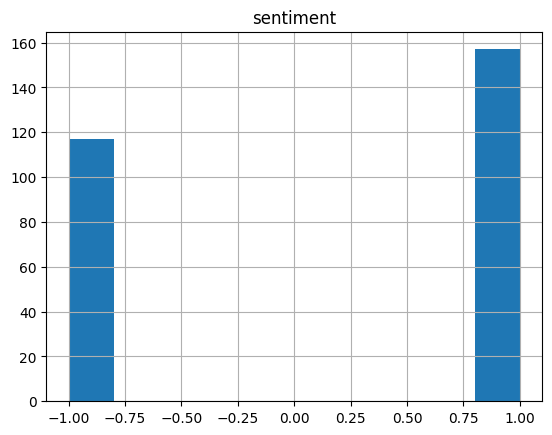

In [19]:
# View number of positive and negative sentiment
products.hist(column=['sentiment'])

In [20]:
if(balance_labels):
    # Report number of positive examples
    positive_sent = products[products['sentiment']==1]
    print('There are {} positive reviews'.format(len(positive_sent)))

    # Report number of negative examples
    negative_sent = products[products['sentiment']==-1]
    print('There are {} negative reviews'.format(len(negative_sent)))

    # Sample number of negative example from positive examples (# positive > # negative)
    positive_sample = positive_sent.sample(n = len(negative_sent))
    print('[Update] There are {} positive reviews'.format(len(positive_sample)))

    # Merge positive and negative examples and update products dataframe
    frames = [negative_sent, positive_sample]
    products = pd.concat(frames)

In [21]:
print(products.head())

                                             Reviews  Satisfaction    DrugId  \
0  Im a retired physician and of all the meds I h...           5.0  146724.0   
1  cleared me right up even with my throat hurtin...           5.0  146724.0   
2                        FALLING AND DONT REALISE IT           1.0  144731.0   
3  My grandfather was prescribed this medication ...           1.0  144731.0   
4                help heart condition operation well           4.0  144731.0   

   tf_idf_word_count_0  tf_idf_word_count_1  tf_idf_word_count_2  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   tf_idf_word_count_3  tf_idf_word_count_4  tf_idf_word_count_5  \
0                  0.0                  0.

In [22]:
print(products.tail())

                                               Reviews  Satisfaction   DrugId  \
269                        pinched nerve in lower back           4.0  93965.0   
270  I had a friend who was diagnosed with Fibromya...           1.0  93965.0   
271  I had mild visual hallucinations after a week ...           1.0  93965.0   
272  had reaction spent week in hospital in semi co...           1.0  93965.0   
273                                                              1.0  93965.0   

     tf_idf_word_count_0  tf_idf_word_count_1  tf_idf_word_count_2  \
269                  0.0                  0.0                  0.0   
270                  0.0                  0.0                  0.0   
271                  0.0                  0.0                  0.0   
272                  0.0                  0.0                  0.0   
273                  0.0                  0.0                  0.0   

     tf_idf_word_count_3  tf_idf_word_count_4  tf_idf_word_count_5  \
269                  0

In [23]:
# split dataset to train/test
X, y = products.loc[:, ~products.columns.isin(['sentiment'])], products.loc[:, products.columns.isin(['sentiment'])]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1, stratify=y)

# Logistic Regression

In [24]:
def predict_probability(X, W, b=0):
    # Take dot product of feature_matrix and coefficients
    score = np.dot(X, W)

    # Compute P(y_i = +1 | x_i, w) using the link function
    y_pred = 1. / (1.+np.exp(-score)) + b
    return y_pred

In [25]:
def compute_avg_log_likelihood(feature_matrix, sentiment, coefficients):
    indicator = (sentiment==+1)
    scores = np.dot(feature_matrix, coefficients)
    logexp = np.log(1. + np.exp(-scores))

    # Simple check to prevent overflow
    mask = np.isinf(logexp)
    logexp[mask] = -scores[mask]

    lp = np.sum((indicator-1)*scores - logexp)/len(feature_matrix)

    return lp

In [26]:
# Helper function to update weights in gradient descent
def update_weights(X, Y, W, b, learning_rate, log_likelihood):
    # no_of_training_examples, no_of_features
    num_features, num_examples = X.shape
    # Make a prediction
    y_pred = 1 / (1 + np.exp(-(X.dot(W) + b)))

    dW = X.T.dot(Y-y_pred) / num_features
    db = np.sum(Y-y_pred) / num_features

    # update weights and bias
    b = b + learning_rate * db
    W = W + learning_rate * dW

    # Compute log-likelihood
    for i in range(len(W)):
        #y_pred = 1 / (1 + np.exp(-(X[:,i].dot(W[i]) + b)))
        #log_likelihood += compute_avg_log_likelihood(X[:,i], Y, W[i])
        log_likelihood = compute_avg_log_likelihood(X[:,i], Y, W[i])

    return W, b, log_likelihood

In [27]:
def predict(X, W, b):
    Z = 1 / (1 + np.exp(- (X.dot(W) + b)))
    Y = [-1 if z <= 0.5 else +1 for z in Z]
    return Y

def fit(X, Y, num_iterations, learning_rate):
    # no_of_training_examples, no_of_features
    num_features, num_examples = X.shape

    # weight initialization
    W = np.zeros(num_examples)
    b = 0
    log_likelihood=0
    likelihood_history=[]

    # gradient ascent learning
    for i in range(num_iterations):
        W, b, log_likelihood = update_weights(X, Y, W, b, learning_rate, log_likelihood)
        likelihood_history.append(log_likelihood)
    return W, b, likelihood_history

In [28]:
# Word count
if(feature_encoding=='word_count_'):
    X_train_sentiment = X_train.loc[:,X_train.columns.str.startswith('word_count_')]
    X_test_sentiment = X_test.loc[:,X_test.columns.str.startswith('word_count_')]

# TF-IDF
if(feature_encoding=='tfidf_word_count_'):
    X_train_sentiment = X_train.loc[:,X_train.columns.str.startswith('tfidf_word_count_')]
    X_test_sentiment = X_test.loc[:,X_test.columns.str.startswith('tfidf_word_count_')]
X_train_sentiment.head()

,tfidf_word_count_tf_idf_word_count_0,tfidf_word_count_tf_idf_word_count_1,tfidf_word_count_tf_idf_word_count_2,tfidf_word_count_tf_idf_word_count_3,tfidf_word_count_tf_idf_word_count_4,tfidf_word_count_tf_idf_word_count_5,tfidf_word_count_tf_idf_word_count_6,tfidf_word_count_tf_idf_word_count_7,tfidf_word_count_tf_idf_word_count_8,tfidf_word_count_tf_idf_word_count_9,...,tfidf_word_count_tf_idf_word_count_2480,tfidf_word_count_tf_idf_word_count_2481,tfidf_word_count_tf_idf_word_count_2482,tfidf_word_count_tf_idf_word_count_2483,tfidf_word_count_tf_idf_word_count_2484,tfidf_word_count_tf_idf_word_count_2485,tfidf_word_count_tf_idf_word_count_2486,tfidf_word_count_tf_idf_word_count_2487,tfidf_word_count_tf_idf_word_count_2488,tfidf_word_count_tf_idf_word_count_2489
220,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.122545,0.0,...,0.0,0.0,0.0,0.0,0.0,0.11134,0.0,0.0,0.0,0.0
112,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
222,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
174,0.0,0.128339,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
167,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


In [29]:
# Hyper-parameters
learning_rate=0.0001
num_iterations=100

sentiment_model_weights, sentiment_model_bias, likelihood_history = fit(X_train_sentiment.to_numpy(), np.ravel(y_train), num_iterations, learning_rate)

In [30]:
review_idx=10
sentiment = predict(X_test_sentiment[:review_idx], sentiment_model_weights, sentiment_model_bias)
sentiment = ['positive' if i==1 else 'negative' for i in sentiment]
sentiment

['negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative']

In [31]:
sentiment = predict(X_test_sentiment[:2], sentiment_model_weights, sentiment_model_bias)
sentiment

[-1, -1]

In [32]:
print(products['Reviews'][:2])
print(products['sentiment'][:2])

0    Im a retired physician and of all the meds I h...
1    cleared me right up even with my throat hurtin...
Name: Reviews, dtype: object
0    1
1    1
Name: sentiment, dtype: int64


In [33]:
print(sentiment_model_weights)
print(sentiment_model_bias)

[ 2.76112571e-05 -3.42898092e-05  0.00000000e+00 ...  0.00000000e+00
  5.59136998e-06 -1.50181310e-05]
-0.0035818271711115152


In [34]:
num_positive_weights = np.sum(sentiment_model_weights >= 0)
num_negative_weights = np.sum(sentiment_model_weights < 0)

print("Number of positive weights: %s " % num_positive_weights)
print("Number of negative weights: %s " % num_negative_weights)

Number of positive weights: 1580 
Number of negative weights: 910 


In [35]:
# Accuracy

def get_classification_accuracy(prediction_labels, true_labels):
    # Compute the number of correctly classified examples
    num_correct = np.sum(prediction_labels == true_labels)

    # Then compute accuracy by dividing num_correct by total number of examples
    accuracy = num_correct / len(true_labels)
    return accuracy

In [36]:
accuracy = get_classification_accuracy(predict(X_train_sentiment.to_numpy(), sentiment_model_weights, sentiment_model_bias),
                                       np.ravel(y_train))
print(accuracy)

0.4293193717277487


In [37]:
accuracy = get_classification_accuracy(predict(X_test_sentiment.to_numpy(), sentiment_model_weights, sentiment_model_bias),
                                       np.ravel(y_test))
print(accuracy)

0.42168674698795183


In [38]:
len(likelihood_history)

100

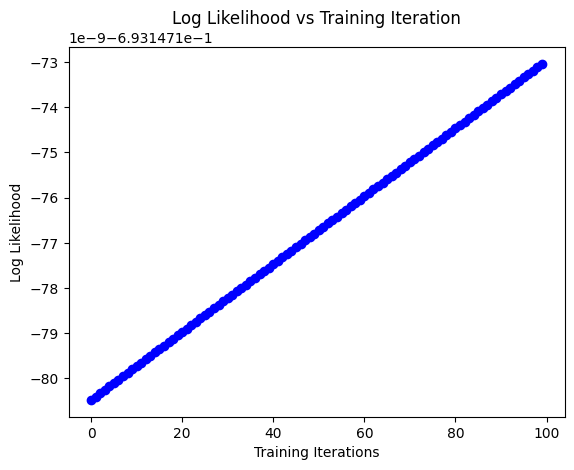

In [39]:
plt.scatter(np.arange(0,len(likelihood_history),1), likelihood_history, color = 'blue')
plt.title('Log Likelihood vs Training Iteration')
plt.xlabel('Training Iterations')
plt.ylabel('Log Likelihood')
plt.show()

In [40]:
# effect of the learning rate
def plot_series(data, x_title, y_title, para1, para2, legend_label='iteration '):
    colors = mcolors.TABLEAU_COLORS

    # Sort colors by hue, saturation, value and name.
    names = sorted(
        colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    # Plot cost of training iterations
    j=0
    for i in range(para1,len(data),para2):
        plt.plot(np.arange(0,len(data[i]),1), data[i], color = names[j], label=legend_label+str(i))
        if(j>=len(names)-1):
            j=0
        else:
            j+=1
    plt.title(y_title+' vs '+x_title+' Iteration')
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.legend()
    plt.show()

In [41]:
# Hyper-parameters
learning_rate=0.00001
num_iterations=100

In [42]:
weights_list=[]
likelihood_history = []
for lr in range(1,50,1):
    learning_rate=lr/100000
    weights, bias, log_lik = fit(X_train_sentiment.to_numpy(), np.ravel(y_train), num_iterations, learning_rate)
    likelihood_history.append(log_lik)

In [43]:
len(likelihood_history[0])

100

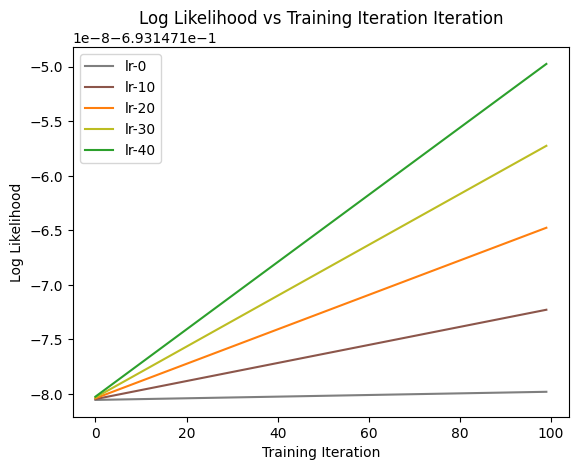

In [44]:
plot_series(likelihood_history, 'Training Iteration', 'Log Likelihood', 0, 10, legend_label='lr-')

In [45]:
# most positive or negative review

# Calculate the class probabilities for the test set
y_prob = predict_probability(X_test_sentiment.to_numpy(), sentiment_model_weights, b=sentiment_model_bias)

# Sort the test set in descending order of their probabilities of being positive
idx = np.argsort(-y_prob)

# Get the indices of the 20 most positive reviews
idx_most_positive = idx[-20:]
print(idx_most_positive)

# Get the corresponding reviews from the test set
most_positive_reviews = X_test.iloc[idx_most_positive]
print(most_positive_reviews)

[29 82 30 11 27 12 46 60 66 31 69 13 49  4  1 25 62 68 47 22]
                                               Reviews  Satisfaction  \
39   I have experienced very heavy and long periods...           1.0   
176  I have had crippling Anxiety related to PTSD I...           2.0   
193  In my 12th month of Post shingles pain  Doesnt...           2.0   
50   hi my name is lara and im 18 years old and i w...           1.0   
192  I am 50 yrs old and have suffered from lower b...           5.0   
30   I am currently taking Lysteda but can only tak...           4.0   
223  I have severe neuropathy from Diabetes in my f...           1.0   
238  The pain from my peripheral neuropathy was so ...           5.0   
260  I have read most of the comments and hardly an...           5.0   
19   I took this pill for a month It was so awful t...           1.0   
194  Taking this drug I was unable to focus My pain...           1.0   
217  Dr started me on Lyrica for pain from Shingles...           5.0   
23

In [46]:
# Get the indices of the 20 most negative reviews
idx_most_negative = idx[:20]

# Get the corresponding reviews from the test set
most_negative_reviews = X_test.iloc[idx_most_negative]
print(most_negative_reviews)

                                               Reviews  Satisfaction  \
100  This medicine has been available in Sweden as ...           5.0   
79   I have been taking Lysteda for 9 months and it...           5.0   
188                                                              4.0   
34                                                               4.0   
27                                                               1.0   
150  This medication has been more than wonderful f...           5.0   
183  stupid medicine in worldif you take this medic...           1.0   
244  Finally the elusive magic pill No pain anymore...           5.0   
95   I get boils and if I take a Lysine per day the...           5.0   
136                       the headaches are unbearable           1.0   
216  httpmedcureusaorgclinicalresearchfindsneuronti...           2.0   
263  Used for pain from pudendal neuropathy  First ...           5.0   
55   I am a 43 year old African American female and...          

In [47]:
accuracy = get_classification_accuracy(predict(X_test_sentiment.to_numpy(), sentiment_model_weights, sentiment_model_bias),
                                       np.ravel(y_test))
print(accuracy)

0.42168674698795183


In [48]:
num_positive = int(np.sum(y_train == +1))
num_negative = int(np.sum(y_train == -1))
print(num_positive)
print(num_negative)

109
82


<ipython-input-48-bf46afc58170>:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  num_positive = int(np.sum(y_train == +1))
<ipython-input-48-bf46afc58170>:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  num_negative = int(np.sum(y_train == -1))


In [49]:
if num_positive >= num_negative:
    y_pred = 1
else:
    y_pred = -1

n_correct = np.sum(y_test == y_pred)
accuracy = n_correct / len(X_test)
print(accuracy)

sentiment    0.578313
dtype: float64


In [50]:
num_iterations=100
sentiment_model = LogisticRegression(random_state=0, max_iter=num_iterations, tol=1e-3)
sentiment_model.fit(X_train_sentiment.to_numpy(), np.ravel(y_train))

sentiment_predictions = sentiment_model.predict(X_test_sentiment.loc[:, X_test_sentiment.columns.str.startswith('tfidf_word_count_')])
cmatrix = confusion_matrix(y_test, sentiment_predictions)
cmatrix

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([[ 8, 27],
       [ 2, 46]])

In [51]:
true_neg, false_pos, false_neg, true_pos = cmatrix.ravel()
print('There are {} false positives'.format(false_pos))
print('There are {} false negatives'.format(false_neg))
print('There are {} true positives'.format(true_pos))
print('There are {} true negatives'.format(true_neg))

There are 27 false positives
There are 2 false negatives
There are 46 true positives
There are 8 true negatives


In [52]:
precision = true_pos/(true_pos+false_pos)
print("Precision on test data: %s" % precision)

false_pos / (true_pos + false_pos)

Precision on test data: 0.6301369863013698


0.3698630136986301

In [53]:
recall = true_pos / (true_pos + false_neg)
print("Recall on test data: %s" % recall)

true_pos / (true_pos + false_neg)

Recall on test data: 0.9583333333333334


0.9583333333333334

In [54]:
# make a list of all the attempts made to fix the data for better accuracy
# 1. cleaning up the data further: replacing emoticons and removing reviews starting with numbers
# 2. ROC curves
# 2. even out the number of reviews for each drug



# SVM Classifier

In [55]:

def manual_metrics(y_true, y_pred):
    true_pos = np.sum((y_pred == 1) & (y_true == 1))
    false_pos = np.sum((y_pred == 1) & (y_true != 1))
    false_neg = np.sum((y_pred != 1) & (y_true == 1))
    true_neg = np.sum((y_pred != 1) & (y_true != 1))

    precision = true_pos / (true_pos + false_pos) if (true_pos + false_pos) > 0 else 0
    recall = true_pos / (true_pos + false_neg) if (true_pos + false_neg) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1_score



In [81]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_sentiment, np.ravel(y_train))

# Prediction
y_pred_train = svm_model.predict(X_train_sentiment)
y_pred_test = svm_model.predict(X_test_sentiment)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


Training Accuracy: 0.9790575916230366
Test Accuracy: 0.6626506024096386


In [57]:
precision, recall, f1_score = manual_metrics(np.ravel(y_test), y_pred_test)

print("Precision on test data:", precision)
print("Recall on test data:", recall)
print("F1-Score on test data:", f1_score)

Precision on test data: 0.6851851851851852
Recall on test data: 0.7708333333333334
F1-Score on test data: 0.7254901960784315


In [58]:
class CustomSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param  # Regularization parameter
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)  # Convert labels to -1, +1
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.weights) - self.bias) >= 1
                if condition:
                    self.weights -= self.learning_rate * (2 * self.lambda_param * self.weights)
                else:
                    self.weights -= self.learning_rate * (2 * self.lambda_param * self.weights - np.dot(x_i, y_[idx]))
                    self.bias -= self.learning_rate * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.weights) - self.bias
        return np.sign(linear_output)



# Initialize and train the custom SVM
model = CustomSVM()
model.fit(X_train_sentiment.to_numpy(), np.ravel(y_train))

# Prediction
predictions_train = model.predict(X_train_sentiment.to_numpy())
predictions_test = model.predict(X_test_sentiment.to_numpy())

# Evaluate the custom SVM
train_accuracy_custom = accuracy_score(y_train, predictions_train)
test_accuracy_custom = accuracy_score(y_test, predictions_test)

print(f"Custom SVM Training Accuracy: {train_accuracy_custom}")
print(f"Custom SVM Test Accuracy: {test_accuracy_custom}")


Custom SVM Training Accuracy: 0.5706806282722513
Custom SVM Test Accuracy: 0.5783132530120482


In [59]:
precision, recall, f1_score = manual_metrics(np.ravel(y_test), y_pred_test)

print("Precision on test data:", precision)
print("Recall on test data:", recall)
print("F1-Score on test data:", f1_score)

Precision on test data: 0.6851851851851852
Recall on test data: 0.7708333333333334
F1-Score on test data: 0.7254901960784315


# Decision Tree Classifier

In [60]:

X_train = X_train.drop(['Reviews'], axis=1)

X_test = X_test.drop(['Reviews'], axis=1)



In [79]:
class CustomDecisionTree:
    def __init__(self, max_depth=5):
        self.max_depth = max_depth
        self.tree = {}

    def _entropy(self, y):
        """Calculate the entropy of label array y."""
        classes, counts = np.unique(y, return_counts=True)
        probabilities = counts / counts.sum()
        entropy = -np.sum(probabilities * np.log2(probabilities + 1e-15))  # Add a small constant to avoid log(0)
        return entropy

    def _information_gain(self, X, y, feature_index):
        """Calculate the information gain of a feature."""
        total_entropy = self._entropy(y)
        values, counts = np.unique(X[:, feature_index], return_counts=True)
        weighted_entropy = sum((counts[i] / sum(counts)) * self._entropy(y[X[:, feature_index] == v])
                               for i, v in enumerate(values))
        information_gain = total_entropy - weighted_entropy
        return information_gain

    def _best_feature(self, X, y):
        """Determine the feature that provides the most information gain."""
        information_gains = [self._information_gain(X, y, i) for i in range(X.shape[1])]
        return np.argmax(information_gains)

    def _build_tree(self, X, y, depth=0):
        """Recursive function to build the decision tree."""
        if y.ndim > 1:
            y = y.ravel()
        if len(np.unique(y)) == 1 or depth == self.max_depth:
            return np.bincount(y).argmax()
        feature_index = self._best_feature(X, y)
        tree = {'index': feature_index, 'children': {}}
        for value in np.unique(X[:, feature_index]):
            sub_X = X[X[:, feature_index] == value]
            sub_y = y[X[:, feature_index] == value]
            subtree = self._build_tree(sub_X, sub_y, depth + 1)
            tree['children'][value] = subtree
        return tree

    def fit(self, X, y):
        """Fit the decision tree model."""
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(y, pd.Series) or isinstance(y, pd.DataFrame):
            y = y.values
        # Convert -1 in y to 0 for np.bincount compatibility
        y = np.where(y == -1, 0, y)
        self.tree = self._build_tree(X, y)

    def _predict_single(self, x, tree):
        """Recursively predict the class of a single sample x."""
        if type(tree) is not dict:
            return tree
        return self._predict_single(x, tree['children'][x[tree['index']]])

    def predict(self, X):
        """Predict classes for an array of samples."""
        if isinstance(X, pd.DataFrame):
            X = X.values
        return np.array([self._predict_single(x, self.tree) for x in X])

# Example usage
tree_classifier = CustomDecisionTree(max_depth=3)
tree_classifier.fit(X_train, y_train)
y_pred_train = tree_classifier.predict(X_train)
y_pred_test = tree_classifier.predict(X_test)


train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
# precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_test, average='macro')

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
precision, recall, f1_score = manual_metrics(np.ravel(y_test), y_pred_test)

print("Precision on test data:", precision)
print("Recall on test data:", recall)
print("F1-Score on test data:", f1_score)


Training Accuracy: 0.5706806282722513
Test Accuracy: 0.5783132530120482
Precision on test data: 1.0
Recall on test data: 1.0
F1-Score on test data: 1.0


In [78]:
# Initialize the DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

# Fit the model on the training data
tree_classifier.fit(X_train, y_train)

# Predict on the training set and the test set
y_pred_train = tree_classifier.predict(X_train)
y_pred_test = tree_classifier.predict(X_test)

# Calculate and print the accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_test, average='binary')

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")


Training Accuracy: 1.0
Test Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
